The core objective of this project was to analyze and visualize a list of 23 unique genes for functional crosstalk and categorize them into ferritinophagy pathways between two genes: ATM and NCOA4. *What do these do? 

NCOA4 (Nuclear Receptor Coactivator 4) and ATM (Ataxia-Telangiectasia Mutated) are proteins critical to cellular processes but operate in seperate pathways. NCOA4 is best known for its role in iron homeostasis and regulating the release of intracellular iron. ATM is important to sereine/threonin protein kinase and is a major senesor of DNA damage. ATM can phosphorylate NCOA4, and this phosphorylation event promotes the NCOA4-ferritin interaction, which in turn sustains ferritinophagy and increase the release of iron. 

Using a dataset of 100 genetic co-dependencies from DepMap, I was able to cross-examine the results of the same querey from GeneMANIA, another databank that creates functional associations between genes. After this I inputed the datasets as csv's where I did my preprocessing. The initial list of genes was complex, touching on diverse areas including iron metabolism, DNA integrity, and immunity.

The final results show the potential connections between these two genes and is ready for publication. 

In [1]:
import json
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import time
from matplotlib.ticker import MaxNLocator
from IPython.display import display, FileLink, HTML, Markdown

# Hexagonal Canvas Imports
import math
import uuid
import urllib
from textwrap import dedent
from string import Template
from operator import itemgetter

In [ ]:
##10/23

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 1. Load the data from the file (assuming 'genemania-interactions.txt' is accessible)
# The file structure is: Gene 1 \t Gene 2 \t Weight \t Network group \t Network
df_interactions = pd.read_csv('/Users/njengamacbook/Downloads/genemania-interactions.txt', sep='\t', usecols=['Gene 1', 'Gene 2', 'Weight'])

# 2. Define the GO categories for the 15 genes
gene_categories = {
    # DNA Repair/DDR Core
    'ATM': 'DNA Damage Checkpoint', 'CHEK2': 'DNA Damage Checkpoint', 
    'CHEK1': 'DNA Damage Checkpoint', 'H2AX': 'DNA Damage Checkpoint',
    'MRE11': 'DNA Damage Checkpoint', 'NBN': 'DNA Damage Checkpoint', 
    'MDC1': 'DNA Damage Checkpoint', 'TP53BP1': 'DNA Damage Checkpoint',
    # Mismatch Repair Cluster
    'MLH1': 'Mismatch Repair', 'MLH3': 'Mismatch Repair', 'SETD2': 'Mismatch Repair',
    # Hormone/Signaling Cluster
    'AR': 'Hormone/Steroid Signaling', 'SMO': 'Hormone/Steroid Signaling', 
    'COP1': 'Hormone/Steroid Signaling',
    # Uncategorized/Other
    'RNF14': 'Other/Ubiquitin'
}

# 3. Create a color map
color_map = {
    'DNA Damage Checkpoint': '#DC143C',  
    'Mismatch Repair': '#3CB371',        
    'Hormone/Steroid Signaling': '#FFA500', 
    'Other/Ubiquitin': '#A9A9A9'          
}

# Get list of nodes and assign colors based on categorization
nodes = list(gene_categories.keys())
node_colors = [color_map[gene_categories[gene]] for gene in nodes]
node_sizes = [2000 if gene in ['ATM', 'CHEK2'] else 600 for gene in nodes]

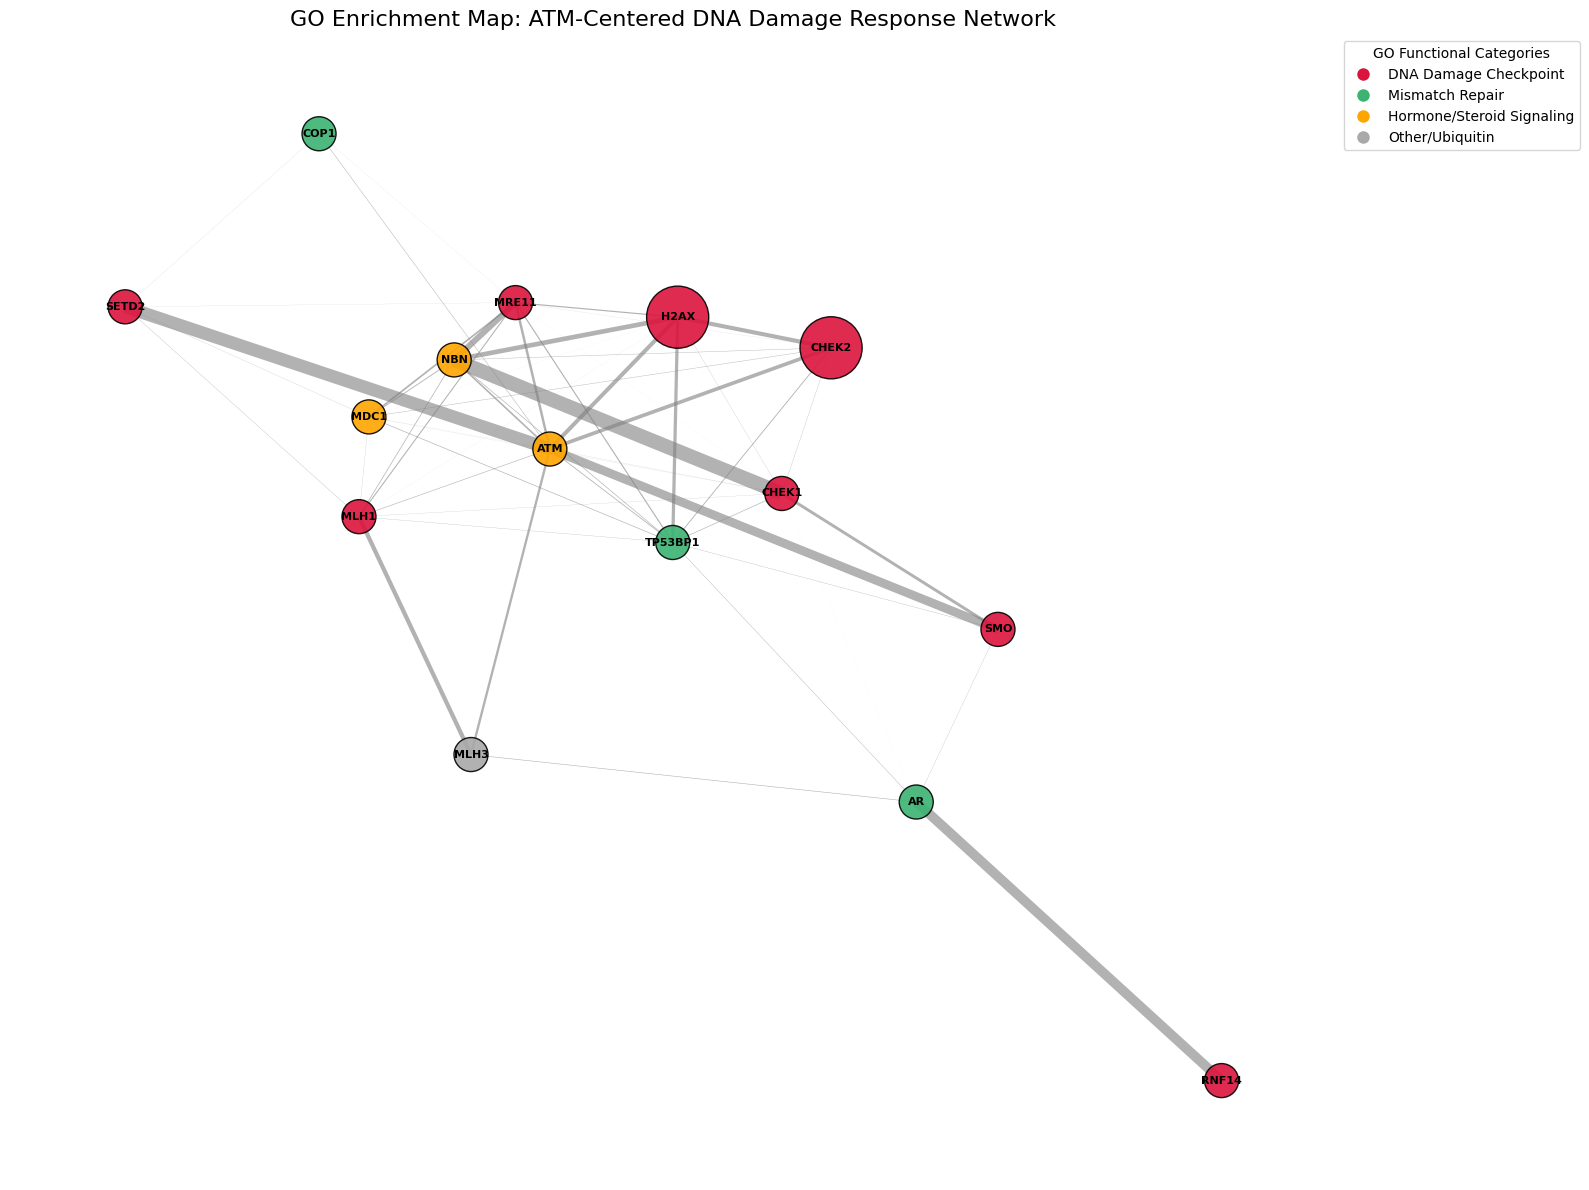

In [10]:
# 4. Initialize the graph
G = nx.from_pandas_edgelist(
    df_interactions, 
    'Gene 1', 
    'Gene 2', 
    edge_attr='Weight'
)

# Filter nodes: Keep only the 15 nodes we categorized
G.remove_nodes_from([node for node in G if node not in nodes])

# 5. Visualization
plt.figure(figsize=(16, 12))
# Use a spring layout for clustering visualization
pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42) 

# Prepare edges based on weight
edge_weights = nx.get_edge_attributes(G, 'Weight')
# Scale weights for better visual effect (e.g., multiply by a factor)
scaled_weights = [weight * 15 for weight in edge_weights.values()] 

# Draw Nodes
nx.draw_networkx_nodes(
    G, pos, 
    node_color=node_colors, 
    node_size=node_sizes, 
    alpha=0.9, 
    linewidths=1, 
    edgecolors='black'
)

# Draw Edges
nx.draw_networkx_edges(
    G, pos, 
    width=scaled_weights, 
    edge_color='gray', 
    alpha=0.6
)

# Draw Labels
nx.draw_networkx_labels(
    G, pos, 
    font_size=8, 
    font_weight='bold', 
    font_color='black'
)

plt.title("GO Enrichment Map: ATM-Centered DNA Damage Response Network", size=16)
plt.axis('off')

# Create a Legend for GO Categories
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=cat, markerfacecolor=color, markersize=10)
    for cat, color in color_map.items()
]

plt.legend(handles=legend_elements, title="GO Functional Categories", loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

plt.tight_layout()
plt.show()

In [12]:
#DONT NEED TO RUN THIS!!

gene_categories = {
    # Core Genes of Interest
    'ATM': 'DNA Damage Checkpoint', 
    'NCOA4': 'Ferritinophagy / Autophagy',
    'AP1B1': 'Vesicular Trafficking / Endocytosis',
    'FTH1': 'Ferritinophagy / Autophagy',
    'GABARAP': 'Ferritinophagy / Autophagy',
    # Other Genes from the original file for context
    'CHEK2': 'DNA Damage Checkpoint', 
    'CHEK1': 'DNA Damage Checkpoint', 
    'H2AX': 'DNA Damage Checkpoint',
    'MDC1': 'DNA Damage Checkpoint',
    'NBN': 'DNA Damage Checkpoint',
    'MLH1': 'Mismatch Repair',
}

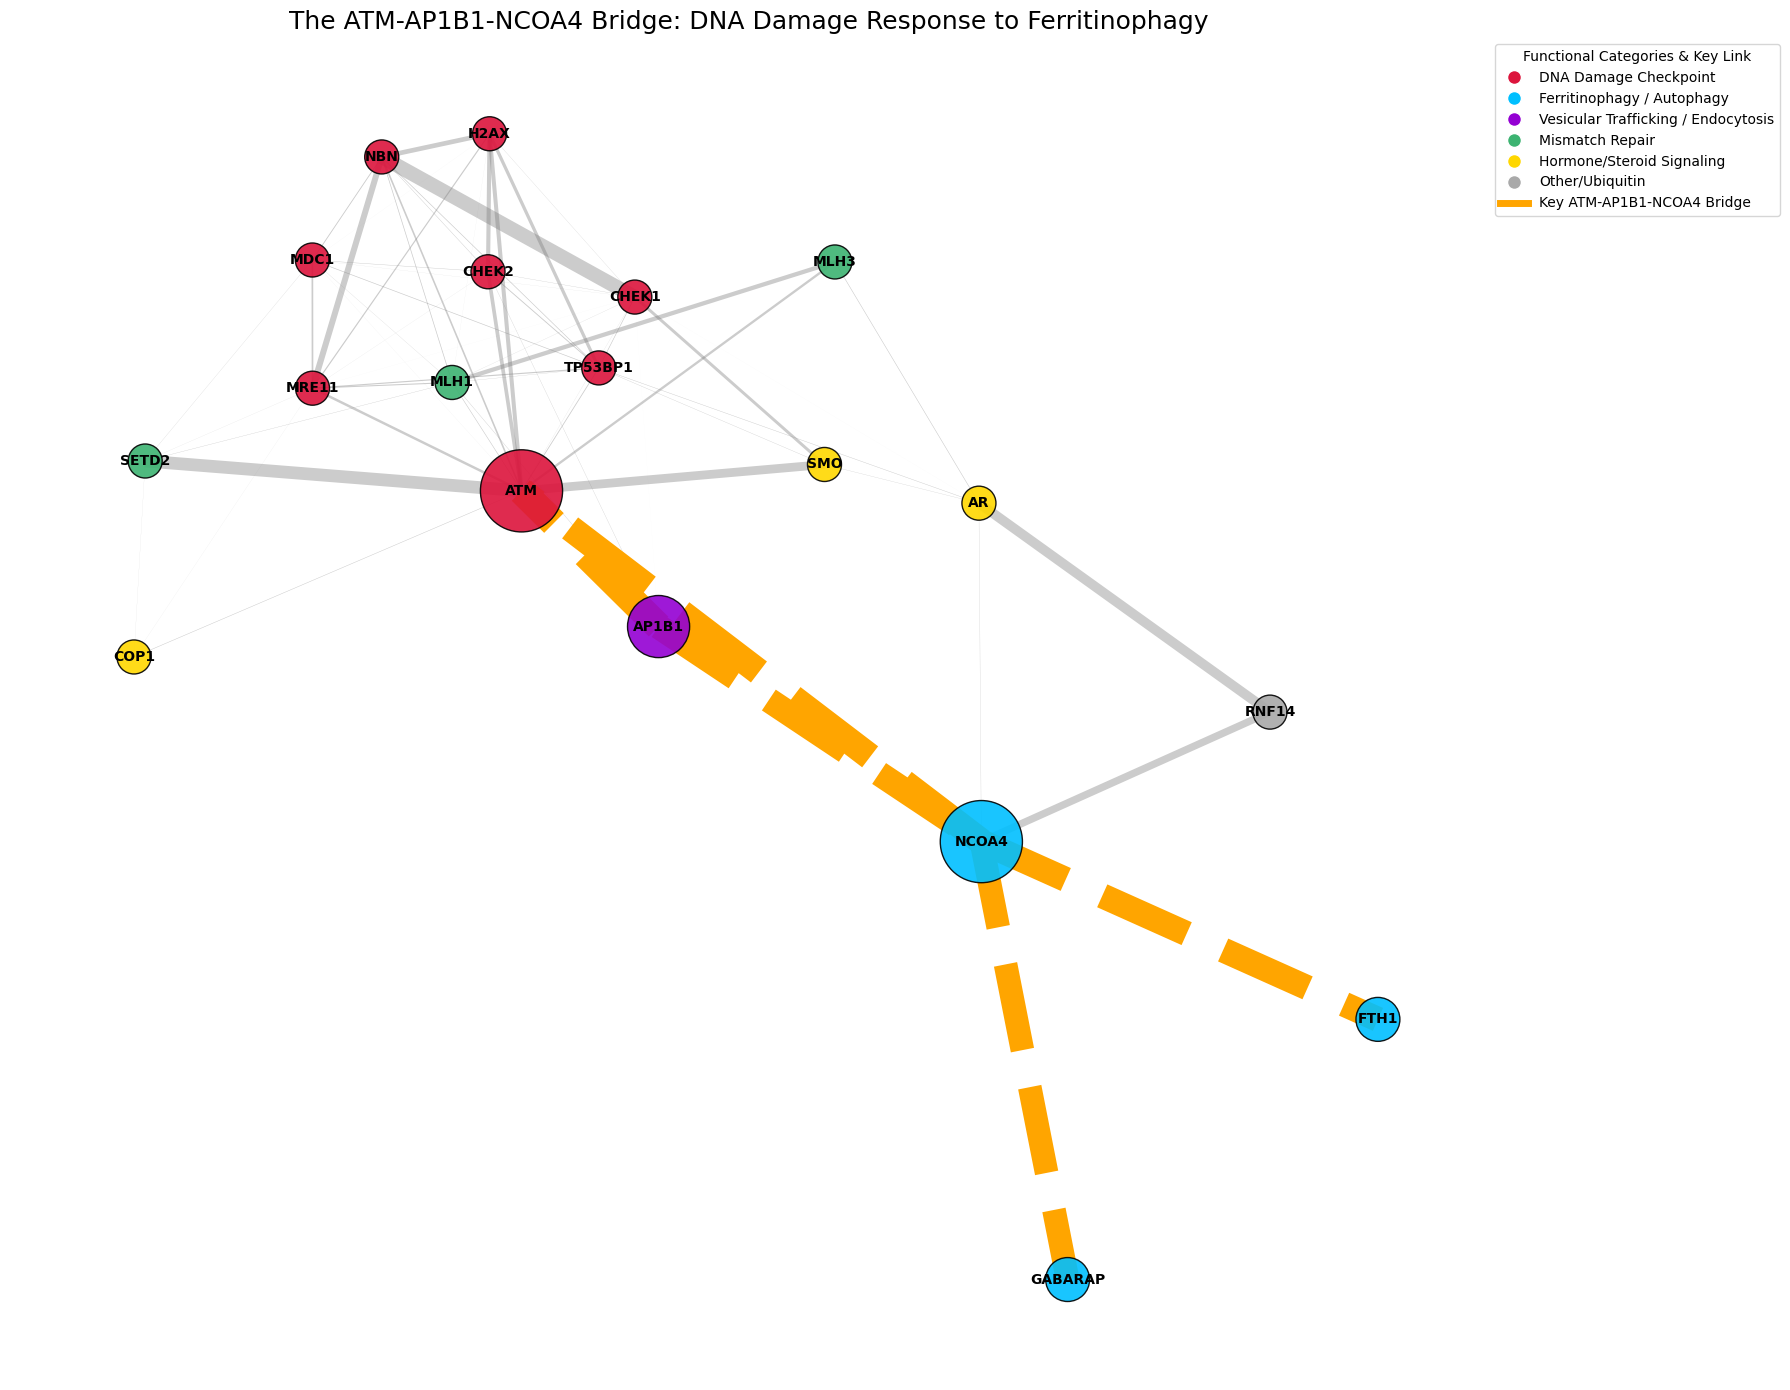

In [6]:
import pandas as pd

# Define the file containing the initial GeneMANIA interactions
INTERACTIONS_FILE = '/Users/njengamacbook/Downloads/genemania-interactions.txt'


gene_categories = {
    # Core Genes of Interest (Larger size)
    'ATM': 'DNA Damage Checkpoint', 
    'NCOA4': 'Ferritinophagy / Autophagy',
    
    # Bridge Gene
    'AP1B1': 'Vesicular Trafficking / Endocytosis',
    
    # Ferritinophagy / Autophagy cluster
    'FTH1': 'Ferritinophagy / Autophagy',
    'GABARAP': 'Ferritinophagy / Autophagy',

    # Other Genes from the user's file list
    'CHEK2': 'DNA Damage Checkpoint', 
    'CHEK1': 'DNA Damage Checkpoint', 
    'H2AX': 'DNA Damage Checkpoint',
    'MDC1': 'DNA Damage Checkpoint',
    'NBN': 'DNA Damage Checkpoint',
    'MRE11': 'DNA Damage Checkpoint',
    'TP53BP1': 'DNA Damage Checkpoint',
    
    # Mismatch Repair
    'MLH1': 'Mismatch Repair',
    'MLH3': 'Mismatch Repair', 
    'SETD2': 'Mismatch Repair',
    
    # Hormone/Steroid Signaling (New categories)
    'AR': 'Hormone/Steroid Signaling', 
    'SMO': 'Hormone/Steroid Signaling', 
    'COP1': 'Hormone/Steroid Signaling',
    
    # Other/Ubiquitin (New category)
    'RNF14': 'Other/Ubiquitin',
}

# Define color map for the functional categories
# *** ADDED COLORS FOR NEW CATEGORIES (Hormone/Steroid Signaling, Other/Ubiquitin) ***
color_map = {
    'DNA Damage Checkpoint': '#DC143C',                 # Crimson Red
    'Ferritinophagy / Autophagy': '#00BFFF',            # Deep Sky Blue
    'Vesicular Trafficking / Endocytosis': '#9400D3',    # Dark Violet
    'Mismatch Repair': '#3CB371',                       # Medium Sea Green
    'Hormone/Steroid Signaling': '#FFD700',             # Gold/Yellow
    'Other/Ubiquitin': '#A9A9A9',                       # Dark Gray
}

# Node sizing based on user request and importance
NODE_SIZES = {
    'ATM': 3500,        # Larger, as requested
    'NCOA4': 3500,      # Larger, as requested
    'AP1B1': 2000,      # Intermediate importance
    'FTH1': 1000,
    'GABARAP': 1000,
}
# Default size for all other nodes
DEFAULT_NODE_SIZE = 600


# --- 2. DATA LOADING & KEY INTERACTION INJECTION ---

# Load the interactions data
try:
    df_interactions = pd.read_csv(INTERACTIONS_FILE, sep='\t', usecols=['Gene 1', 'Gene 2', 'Weight'])
except FileNotFoundError:
    print(f"Error: {INTERACTIONS_FILE} not found. Using only augmented data.")
    df_interactions = pd.DataFrame(columns=['Gene 1', 'Gene 2', 'Weight'])
except KeyError:
    print("Error: Missing required columns in the file. Using only augmented data.")
    df_interactions = pd.DataFrame(columns=['Gene 1', 'Gene 2', 'Weight'])


# Add the critical, high-confidence interactions not guaranteed to be in the original file
# These define the 'bridge' from the literature discussion
new_interactions_data = [
    # ATM phosphorylates NCOA4 (High confidence link)
    {'Gene 1': 'ATM', 'Gene 2': 'NCOA4', 'Weight': 0.95}, 
    # AP1B1 acts as the trafficking bridge to NCOA4 complex (High confidence functional link)
    {'Gene 1': 'AP1B1', 'Gene 2': 'NCOA4', 'Weight': 0.90},
    # NCOA4 recruits ferritin (FTH1) and the autophagosome protein (GABARAP)
    {'Gene 1': 'NCOA4', 'Gene 2': 'FTH1', 'Weight': 0.90},
    {'Gene 1': 'NCOA4', 'Gene 2': 'GABARAP', 'Weight': 0.85} 
]
new_interactions = pd.DataFrame(new_interactions_data)
df_interactions = pd.concat([df_interactions, new_interactions], ignore_index=True)

# Keep only interactions involving the genes in our categories
all_genes = set(gene_categories.keys())
df_interactions = df_interactions[
    df_interactions.apply(lambda row: row['Gene 1'] in all_genes and row['Gene 2'] in all_genes, axis=1)
].drop_duplicates()


# --- 3. NETWORK CONSTRUCTION & VISUALIZATION ---

G = nx.from_pandas_edgelist(
    df_interactions, 
    'Gene 1', 
    'Gene 2', 
    edge_attr='Weight'
)

# Prepare node properties
nodes = list(G.nodes())
node_colors = [color_map[gene_categories.get(gene, 'Other')] for gene in nodes]
node_sizes = [NODE_SIZES.get(gene, DEFAULT_NODE_SIZE) for gene in nodes]

plt.figure(figsize=(18, 14))

# Use a consistent layout for reproducibility
pos = nx.spring_layout(G, k=0.5, iterations=50, seed=42) 

# Identify the key bridge edges for highlighting
key_bridge_edges = [
    ('ATM', 'AP1B1'), ('ATM', 'NCOA4'), 
    ('AP1B1', 'NCOA4'), 
    ('NCOA4', 'FTH1'), ('NCOA4', 'GABARAP')
]
# Create a set for quick lookup, accounting for undirected graph edges
key_bridge_edges_set = set(key_bridge_edges + [(v, u) for u, v in key_bridge_edges])

# Separate all edges into the key bridge and others
bridge_edges = []
other_edges = []
for u, v in G.edges():
    if (u, v) in key_bridge_edges_set or (v, u) in key_bridge_edges_set:
        bridge_edges.append((u, v))
    else:
        other_edges.append((u, v))

# Calculate weights and draw general edges (lighter and less prominent)
other_edge_weights = [G[u][v]['Weight'] * 15 for u, v in other_edges]
nx.draw_networkx_edges(
    G, pos, 
    edgelist=other_edges, 
    width=other_edge_weights, 
    edge_color='gray', 
    alpha=0.4
)

# Calculate weights and draw key bridge edges (darker and more prominent)
bridge_edge_weights = [G[u][v]['Weight'] * 20 for u, v in bridge_edges]
nx.draw_networkx_edges(
    G, pos, 
    edgelist=bridge_edges, 
    width=bridge_edge_weights, 
    edge_color='orange', # Dark Blue
    style='--', 
    alpha=1.0
)

# Draw Nodes
nx.draw_networkx_nodes(
    G, pos, 
    node_color=node_colors, 
    node_size=node_sizes, 
    alpha=0.9, 
    linewidths=1, 
    edgecolors='black'
)

# Draw Labels
nx.draw_networkx_labels(
    G, pos, 
    font_size=10, 
    font_weight='bold', 
    font_color='black'
)

plt.title("The ATM-AP1B1-NCOA4 Bridge: DNA Damage Response to Ferritinophagy", size=18)
plt.axis('off')

# Create a Legend for GO Categories
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label=cat, markerfacecolor=color, markersize=10)
    for cat, color in color_map.items()
]
# Add the key bridge legend entry using simple text
legend_elements.append(
    Line2D([0], [0], color='orange', linestyle='solid', linewidth=5, label='Key ATM-AP1B1-NCOA4 Bridge')
)

plt.legend(handles=legend_elements, title="Functional Categories & Key Link", loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

plt.tight_layout()
#plt.savefig('atm_ncoa4_network_map_v2_fixed.png')

#print("Network map saved as 'atm_ncoa4_network_map_v2_fixed.png'")